# <b> Chapter 7

Support material:

https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2014/11b300b528689cba71f91588d6248143_MIT18_05S14_Reading17b.pdf

In [79]:
from statistics import NormalDist
from typing import Tuple, List
from math import factorial, sqrt
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

np.random.seed(23)

## Statistical Hypothesis Testing

### ⭐ Example:

#### Consider that: 
   - The probability of a coin landing heads is p
   - The number of heads resulting from <i>n</i> flips is <i>X</i>


**Null hypothesis:** <br><br>
$
H_0: p = \frac{1}{2}
$

**Alternative hypothesis:** <br><br>
$
H_1: p \neq \frac{1}{2}
$
<br><br>

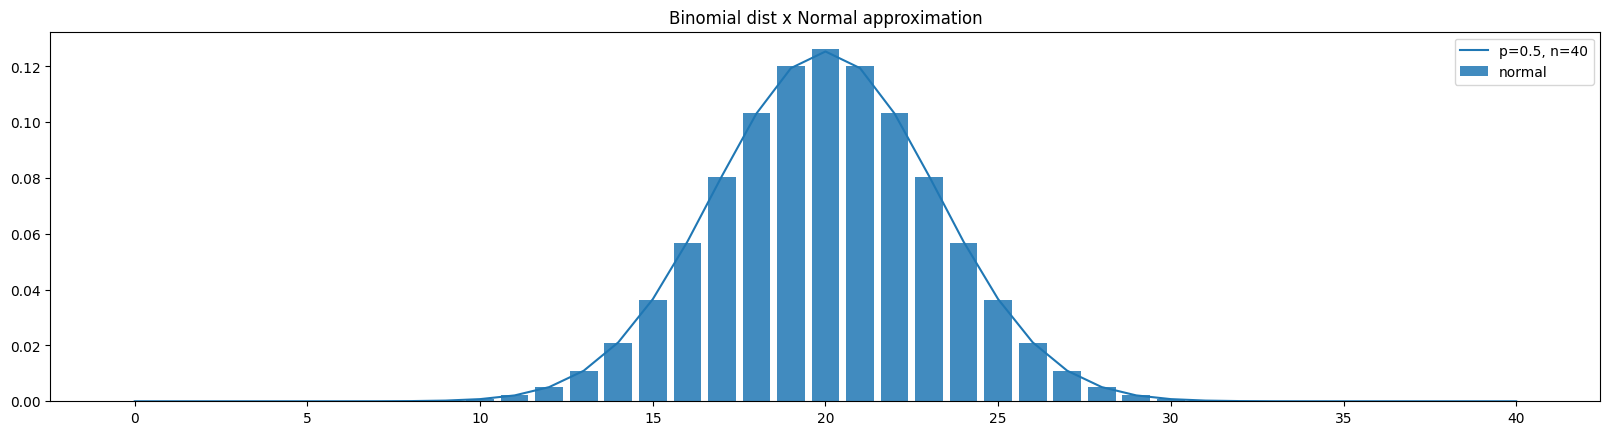

In [80]:
# Calculating the probability of acceptance of H0 along with the rejection region and plotting the Binomial Distribution graph


def binomial_dist(p: float, n: int) -> List[float]:
    """Calculates and returns the PMF of a number n of flips given a bias p."""
    def bin_coef(n, k): return factorial(n) / (factorial(k) * factorial(n - k))
    return [bin_coef(n, k) * pow(p, k) * pow(1 - p, n - k) for k in range(n + 1)]


def normal_binomial_approx(n: int, p: float) -> Tuple[float, float]:
    """Calculates the mu and sigma that corresponds to a Binomial(n, p)"""
    mu = n * p
    sigma = sqrt(n * p * (1 - p))
    return mu, sigma


n = 40  # Sample large enough
p = 0.5  # Supposing H0
err = 0.05  # Significance
mu, sigma = normal_binomial_approx(n, p)
def pdf(x): return NormalDist(mu, sigma).pdf(x)
def cdf(x): return sum(binomial_dist(p, n)[: x + 1])
def cdf_cc(x): return NormalDist(mu, sigma).cdf(x)


plt.figure().set_figwidth(20)
plt.plot(
    [x for x in range(n + 1)], binomial_dist(p, n), label=f"p={p}, n={n}", color="C0"
)
plt.bar(
    [x for x in range(n + 1)],
    [pdf(x) for x in range(n + 1)],
    label="normal",
    alpha=0.85,
)
plt.title("Binomial dist x Normal approximation")
plt.legend()
plt.show()

Suppose we got 15 heads out of these 40 throws, or $ P(X \leq 15) $. What can be said about the hypothesis?

In [81]:
print(
    f"CDF of P(X ≤ {15}) with and w/o Continuity Correction\n\nNo C.C: {cdf(15)}\nWith C.C: {cdf_cc(15.5)}")

CDF of P(X ≤ 15) with and w/o Continuity Correction

No C.C: 0.07692997208141605
With C.C: 0.07736446174268924


Its clear that in both scenarios $ P(X \leq 12) > 0.05 $, which means that we Fail to reject the null hypothesis.


## Bayesian Inference

### Beta distribution

- PDF
$$ \frac{x^{\alpha-1}(1-x)^{\beta-1}} {\Beta(\alpha,\beta)}\! $$

In [82]:
def B(alpha: float, beta: float) -> float:
    """Normalizes the probabilities"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)


def beta_pdf(x: float, alpha: float, beta: float) -> float:
    """Calcuates the pdf for the beta dist"""
    if x <= 0 or x >= 1:
        return 0
    return (x ** (alpha - 1) * (1 - x) ** (beta - 1)) / B(alpha, beta)

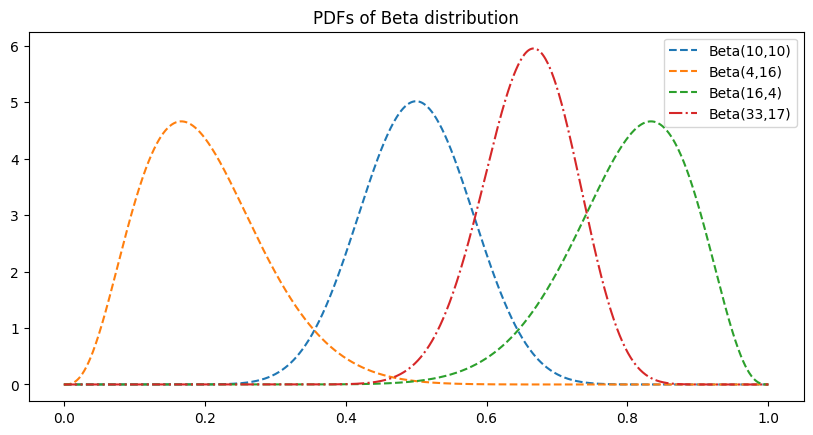

In [107]:
# Plotting a graph with some beta pdfs

alpha = 1
beta = 1

xs = np.linspace(0, 1.0, 1000)
y1 = [beta_pdf(x, 20, 20) for x in xs]
y2 = [beta_pdf(x, 4, 16) for x in xs]
y3 = [beta_pdf(x, 16, 4) for x in xs]
y4 = [beta_pdf(x, 33, 17) for x in xs]
plt.figure().set_figwidth(10)
plt.plot(xs, y1, label='Beta(10,10)', linestyle='--', c='C0')
plt.plot(xs, y2, label='Beta(4,16)', linestyle='--', c='C1')
plt.plot(xs, y3, label='Beta(16,4)', linestyle='--', c='C2')
plt.plot(xs, y4, label='Beta(33,17)', linestyle='-.', c='C3')
plt.title('PDFs of Beta distribution')
plt.legend()
plt.show()